In [14]:
import numpy as np
import matplotlib.pyplot as plt

In [15]:
alpha = 5
beta = 3
N = 500
DIM = 2

np.random.seed(2)
#Genero N angoli a random sul cerchio unitario da una distribuzione uniforme
theta = np.random.uniform(0, 2*np.pi, (N,1))
eps_noise = 0.2 * np.random.normal(size=[N,1]) # sto inserendo del rumore gaussiano di modulo 0.2
circle = np.hstack([np.cos(theta), np.sin(theta)])
print(circle)

[[-9.20219311e-01  3.91403142e-01]
 [ 9.86761220e-01  1.62179820e-01]
 [-9.51709714e-01 -3.06999382e-01]
 [-9.18557226e-01  3.95288025e-01]
 [-8.77417657e-01  4.79727272e-01]
 [-4.83596130e-01  8.75291256e-01]
 [ 2.81110462e-01  9.59675418e-01]
 [-7.32096642e-01 -6.81200783e-01]
 [-3.06952714e-01  9.51724766e-01]
 [-1.05532014e-01  9.94415906e-01]
 [-7.24073401e-01 -6.89722923e-01]
 [-9.83283032e-01 -1.82083716e-01]
 [ 6.63289314e-01  7.48363071e-01]
 [-9.96362980e-01 -8.52103975e-02]
 [ 4.00375396e-01  9.16351211e-01]
 [ 2.20197838e-01 -9.75455233e-01]
 [ 6.07807031e-01 -7.94084765e-01]
 [-9.99344453e-01  3.62031057e-02]
 [ 5.70170767e-01 -8.21526199e-01]
 [ 8.77377628e-01  4.79800478e-01]
 [-9.99456797e-01 -3.29561878e-02]
 [ 9.17038209e-01  3.98799352e-01]
 [-8.99740956e-01  4.36424348e-01]
 [ 8.21635700e-01  5.70012962e-01]
 [ 6.97445456e-01  7.16637870e-01]
 [-8.20867106e-01 -5.71119248e-01]
 [ 1.50151042e-01  9.88663069e-01]
 [ 7.82603307e-01  6.22520733e-01]
 [ 1.85491092e-01  9

In [16]:
# Passo dal cerchio all'ellisse ruotando e dilatando e aggiungo il rumore gaussiano
B = np.random.randint(-3, 3, (DIM, DIM))
noisy_ellipse = circle.dot(B) + eps_noise

In [17]:
# X e Y sono le nuove coordinate dell'ellisse
X = noisy_ellipse[:,0:1]
Y = noisy_ellipse[:,1:]
print(X)

[[-3.18153553]
 [ 1.35543929]
 [-0.81830841]
 [-3.12080993]
 [-2.90902372]
 [-3.68243761]
 [-2.21258344]
 [ 0.43777019]
 [-3.23797361]
 [-3.24521784]
 [ 0.72480695]
 [-1.5189139 ]
 [-1.13582022]
 [-1.78327827]
 [-1.72870084]
 [ 3.16318577]
 [ 3.29199008]
 [-2.16889577]
 [ 3.761071  ]
 [ 0.10418589]
 [-2.00882171]
 [ 0.67453871]
 [-3.17489013]
 [-0.00932585]
 [-0.51711707]
 [ 0.07586384]
 [-2.67876906]
 [-0.1491324 ]
 [-2.58928267]
 [-3.79335739]
 [-2.76512217]
 [-2.48904153]
 [ 1.4280335 ]
 [-2.31627215]
 [-1.78484349]
 [-3.32931829]
 [ 3.2416606 ]
 [-0.18150285]
 [-1.62167933]
 [ 1.83092288]
 [ 2.57027038]
 [-2.21484811]
 [ 3.38881449]
 [-3.53663256]
 [-0.1397081 ]
 [-3.21450437]
 [-3.03805722]
 [ 3.36485542]
 [-1.24731984]
 [ 2.744146  ]
 [-1.31729578]
 [ 0.06871563]
 [-3.60542533]
 [ 3.36983209]
 [-3.4609859 ]
 [ 1.2103089 ]
 [-2.73916159]
 [ 0.29664264]
 [ 2.49476947]
 [ 2.40124663]
 [ 3.26179862]
 [-0.05010779]
 [ 3.33036746]
 [-1.44451047]
 [-3.59487265]
 [-1.45894615]
 [-3.62337

In [18]:
# Formulate and solve the least squares problem ||Ax - b ||^2
A = np.hstack([X**2, X * Y, Y**2, X, Y])
b = np.ones_like(X)
x = np.linalg.lstsq(A, b)[0].squeeze()

C:\Users\kid\AppData\Local\Temp\ipykernel_10740\1849436456.py:4: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  x = np.linalg.lstsq(A, b)[0].squeeze()


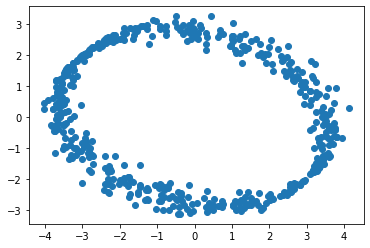

In [19]:
# Plot the noisy data
plt.scatter(X, Y, label='Data Points')

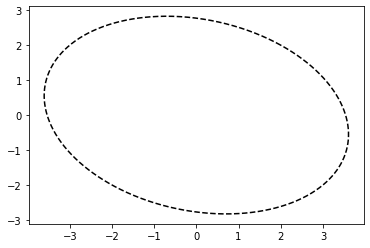

In [20]:
# Plot the original ellipse from which the data was generated
phi = np.linspace(0, 2*np.pi, 1000).reshape((1000,1))
c = np.hstack([np.cos(phi), np.sin(phi)])
ground_truth_ellipse = c.dot(B)
plt.plot(ground_truth_ellipse[:,0], ground_truth_ellipse[:,1], 'k--', label='Generating Ellipse')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


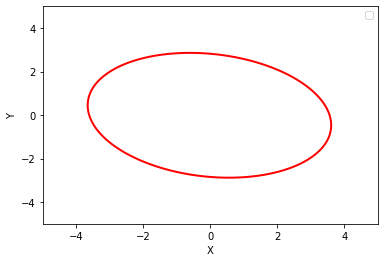

In [21]:
# Plot the least squares ellipse
x_coord = np.linspace(-5,5,300)
y_coord = np.linspace(-5,5,300)
X_coord, Y_coord = np.meshgrid(x_coord, y_coord)
Z_coord = x[0] * X_coord ** 2 + x[1] * X_coord * Y_coord + x[2] * Y_coord**2 + x[3] * X_coord + x[4] * Y_coord
plt.contour(X_coord, Y_coord, Z_coord, levels=[1], colors=('r'), linewidths=2)

plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.show()
